In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_filtered = pd.read_csv('../Intermediate_data/filtered_movies_genre.csv',index_col= 0)

In [3]:
movies_filtered.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,1626,Fire Down Below (1997),1997-09-05,Félix Enríquez Alcalá,"Steven Seagal, Marg Helgenberger, Stephen Lang...",119123,14289.0,"['Action', 'Drama', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0
1,106491,47 Ronin (2013),2013-12-25,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki, R...",1335975,64686.0,"['Action', 'Adventure', 'Fantasy']",1,1,...,0,0,0,0,0,0,0,0,0,0
2,85414,Source Code (2011),2011-04-01,Duncan Jones,"Jake Gyllenhaal, Michelle Monaghan, Vera Farmi...",945513,45612.0,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Thri...",1,0,...,0,0,0,1,0,1,1,0,0,0
3,124805,Venus & Vegas (2010),2010-11-01,Demian Lichtenstein,"Eddie Kaye Thomas,Donald Faison,Eddie Guerra,J...",423474,68716.0,"['Action', 'Comedy']",1,0,...,0,0,0,0,0,0,0,0,0,0
4,144514,Quick (2011),2011-07-21,Beom-gu Cho,"Yoo Seung-Mok,Yoon Je-moon,Kim Tae-woo,Lee Min...",2007413,77175.0,"['Action', 'Comedy', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
movies_filtered.shape

(22351, 28)

In [5]:
train_subset  = pd.read_csv('../Intermediate_data/train_subset.csv', index_col= 0)

In [6]:
train_subset.head()

,userId,movieId,rating,timestamp,year
25352,127137,115824,4.5,2017-12-31 23:59:50,2017
25353,142748,2762,5.0,2017-12-31 23:59:41,2017
25354,196198,1198,3.5,2017-12-31 23:59:17,2017
25355,142748,71057,4.5,2017-12-31 23:58:09,2017
25356,142748,152077,5.0,2017-12-31 23:57:32,2017


In [7]:
train_subset = train_subset.reset_index()

In [8]:
train_new = train_subset.merge(movies_filtered, how = 'inner', left_on = 'movieId', right_on = 'movieId' )

In [9]:
train_new.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,1,0,0,1,0,0,0,0,0,0


In [10]:
train_new.shape, train_subset.shape , movies_filtered.shape

((1200795, 33), (1993188, 6), (22351, 28))

In [11]:
len(train_new['movieId'].unique()), len(train_new['userId'].unique())

(17035, 19203)

In [12]:
UM= train_new.pivot(index='userId', columns='movieId', values='rating')
UM_matrix = np.matrix(UM.values)

In [14]:
UM_matrix

matrix([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
UM_matrix.shape

(19203, 17035)

In [18]:
import CollabFiltering as CF

In [19]:
p,q = CF.SVD(UM_matrix,hiddenk = 20, epoch = 10 )

In [20]:
def rmse(p,q,UM, UM_pred):

    UM_pred =  np.dot(p,q.T)
    subt = np.subtract(UM,UM_pred)
    RMSE = np.sqrt(np.square(sub[~np.isnan(sub)]).mean())

    return(RMSE)

In [23]:
RMSE = rmse(p,q,UM_matrix)

NameError: name 'UM_matrix_pred' is not defined

In [ ]:
RMSE

### Clustering model on the reduced dimension
Clustering at User level on p matrix

In [24]:
from sklearn.mixture import GaussianMixture as GMM

In [40]:
gmm_fit = GMM(n_components=6).fit(p)

In [41]:
prediction_gmm = gmm_fit.predict(p)
probs = gmm_fit.predict_proba(p)


In [42]:
probs[[0]]

array([[1.48145044e-02, 3.02277940e-02, 2.53390593e-02, 4.93081338e-02,
        2.66034636e-04, 8.80044474e-01]])

In [43]:
user_cluster = pd.DataFrame({'userId': UM.index , 'cluster': prediction_gmm })

In [44]:
user_cluster.head()

,cluster,userId
0,5,100032
1,3,100036
2,3,100053
3,1,100057
4,5,100058


In [45]:
import matplotlib.pyplot as plt 

In [46]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(p)
          for n in n_components]

Text(0.5, 0, 'n_components')

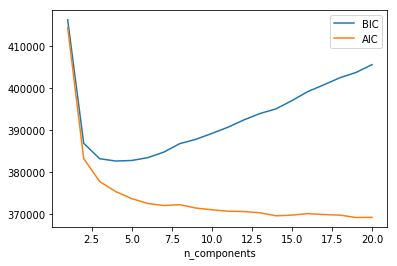

In [47]:
plt.plot(n_components, [m.bic(p) for m in models], label='BIC')
plt.plot(n_components, [m.aic(p) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

---
Merging this data to the training dataset

In [48]:
train_clusters = train_new.merge(user_cluster,how = 'left' , left_on= 'userId', right_on= 'userId')

In [49]:
train_clusters.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan,cluster
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,2
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,5
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,5


In [50]:
user_cluster['cluster'].value_counts()

3    5920
2    5377
0    2177
5    2002
1    1918
4    1809
Name: cluster, dtype: int64

In [51]:
genres_lst = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

In [52]:
train_clusters.groupby('cluster')[genres_lst].sum().T/user_cluster['cluster'].value_counts()

,0,1,2,3,4,5
Action,21.483693,34.489051,19.267249,31.976182,17.845218,13.798701
Adventure,17.424437,27.443691,16.711177,26.799662,15.660033,10.829171
Animation,5.679375,9.527112,5.901990,9.718243,5.720840,3.443556
Children,5.395498,9.173097,5.858285,9.593750,5.560531,3.303696
Comedy,15.815342,27.128780,16.166822,26.994595,15.953013,10.427073
Crime,10.651355,17.155892,9.807699,16.087838,9.339414,7.678821
Documentary,0.360588,0.675704,0.419379,0.642399,0.530680,0.300200
Drama,20.875976,35.510949,20.704482,33.713007,20.271421,14.928571
Fantasy,9.031236,14.491658,8.998698,14.561486,8.482587,5.705794
Film-Noir,0.442811,0.927007,0.419565,0.851182,0.405196,0.374126


In [53]:
train_clusters.columns

Index(['index', 'userId', 'movieId', 'rating', 'timestamp', 'year', 'title',
       'releaseDate', 'directedBy', 'starring', 'imdbId', 'tmdbId', 'genres',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'nan', 'cluster'],
      dtype='object')

In [54]:
user_cluster.to_csv('../Intermediate_data/user_clusters.csv')

In [55]:
train_clusters.to_csv('../../data/train_clusters.csv')